In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy openpyxl


In [9]:
from google.colab import files
uploaded = files.upload()   # ← اختاري ملف sales_data_sample.csv من جهازك


Saving sales_data_sample.csv to sales_data_sample.csv


In [10]:
import pandas as pd
data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(data.shape)
data.head()


(2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [11]:
# حذف القيم المفقودة
data.dropna(inplace=True)

# تحويل التاريخ إلى نوع datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# حذف القيم الشاذة في المبيعات
data = data[(np.abs(zscore(data['SALES'])) < 3)]

# إنشاء عمود السنة والشهر
data['YEAR'] = data['ORDERDATE'].dt.year
data['MONTH'] = data['ORDERDATE'].dt.month

print("✅ تم تنظيف البيانات بنجاح!")


✅ تم تنظيف البيانات بنجاح!


3. التحليل الاستكشافي (EDA)

In [12]:
print(data.describe())


        ORDERNUMBER  QUANTITYORDERED   PRICEEACH  ORDERLINENUMBER  \
count    145.000000       145.000000  145.000000       145.000000   
mean   10269.537931        33.800000   83.919862         6.731034   
min    10120.000000        15.000000   26.880000         1.000000   
25%    10148.000000        26.000000   66.040000         4.000000   
50%    10270.000000        33.000000   96.860000         7.000000   
75%    10361.000000        40.000000  100.000000        10.000000   
max    10420.000000        66.000000  100.000000        15.000000   
std      106.693943         9.674279   19.946352         3.824728   

             SALES                      ORDERDATE      QTR_ID    MONTH_ID  \
count   145.000000                            145  145.000000  145.000000   
mean   3362.231931  2004-06-02 21:11:10.344827648    2.689655    7.041379   
min     652.350000            2003-04-29 00:00:00    1.000000    1.000000   
25%    2233.690000            2003-09-11 00:00:00    2.000000    4.000

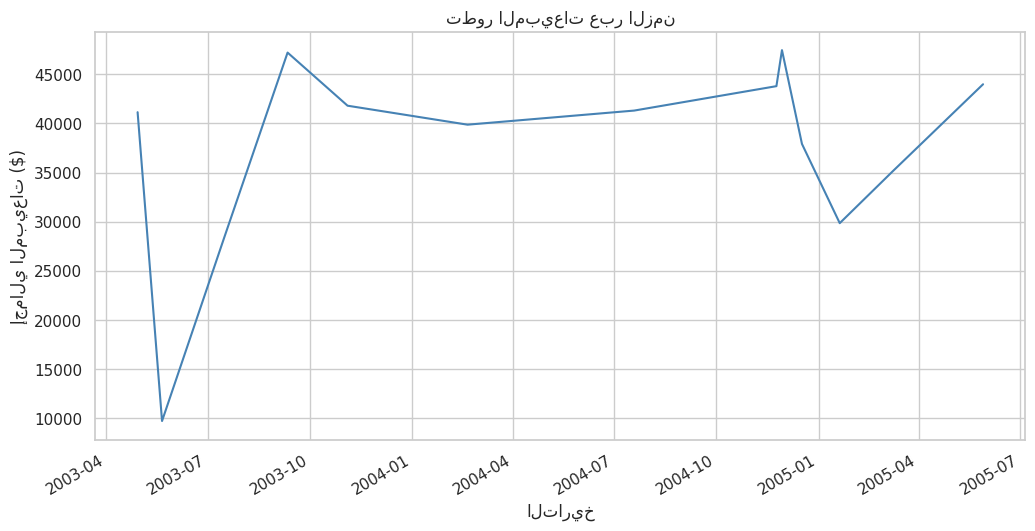

In [13]:
sales_by_date = data.groupby('ORDERDATE')['SALES'].sum()

plt.figure(figsize=(12,6))
sales_by_date.plot(kind='line', color='steelblue')
plt.title('تطور المبيعات عبر الزمن')
plt.xlabel('التاريخ')
plt.ylabel('إجمالي المبيعات ($)')
plt.show()


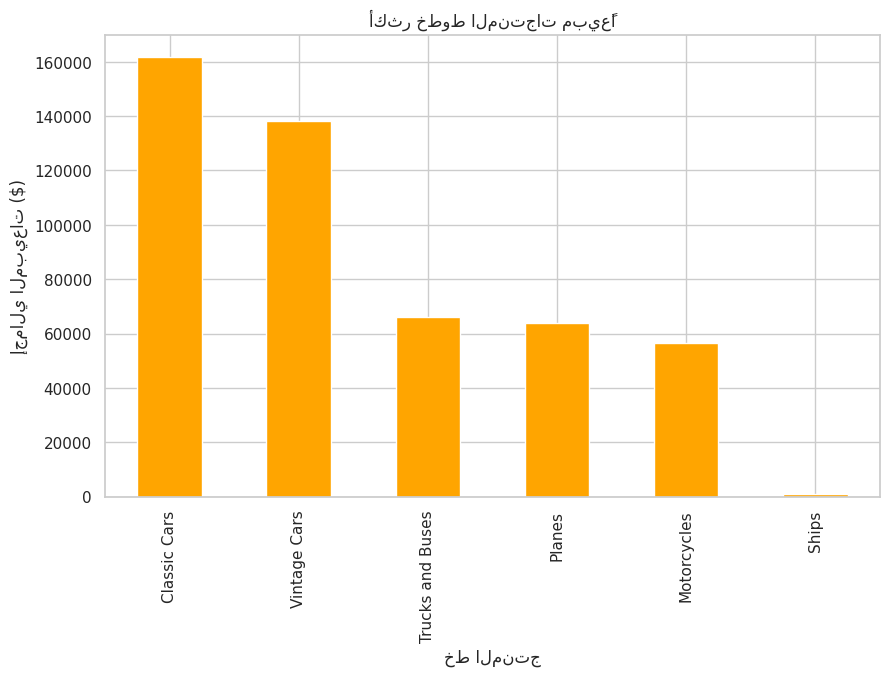

In [14]:
top_products = data.groupby('PRODUCTLINE')['SALES'].sum().nlargest(10)
top_products.plot(kind='bar', color='orange')
plt.title('أكثر خطوط المنتجات مبيعًا')
plt.xlabel('خط المنتج')
plt.ylabel('إجمالي المبيعات ($)')
plt.show()


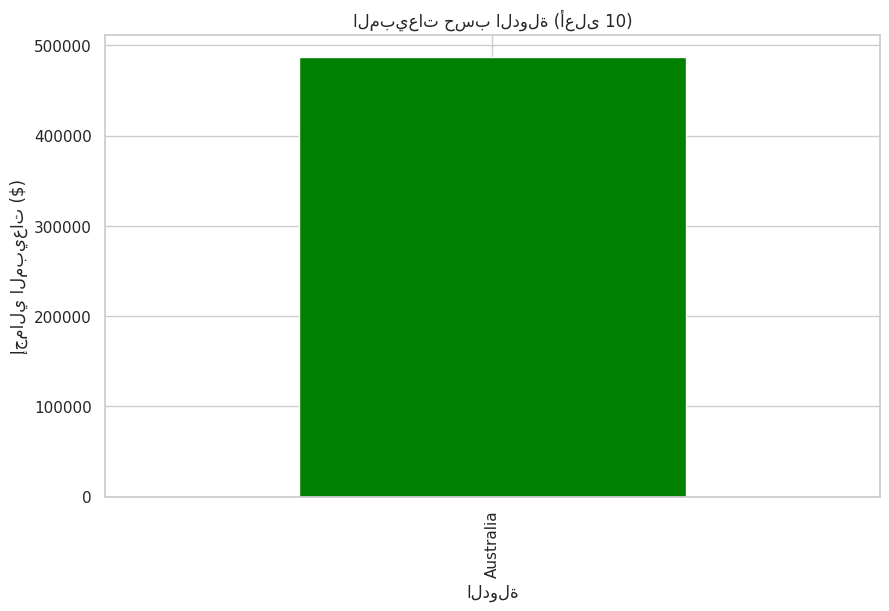

In [15]:
country_sales = data.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', color='green')
plt.title('المبيعات حسب الدولة (أعلى 10)')
plt.xlabel('الدولة')
plt.ylabel('إجمالي المبيعات ($)')
plt.show()


تحليل متقدم — تجميع العملاء (Customer Segmentation)

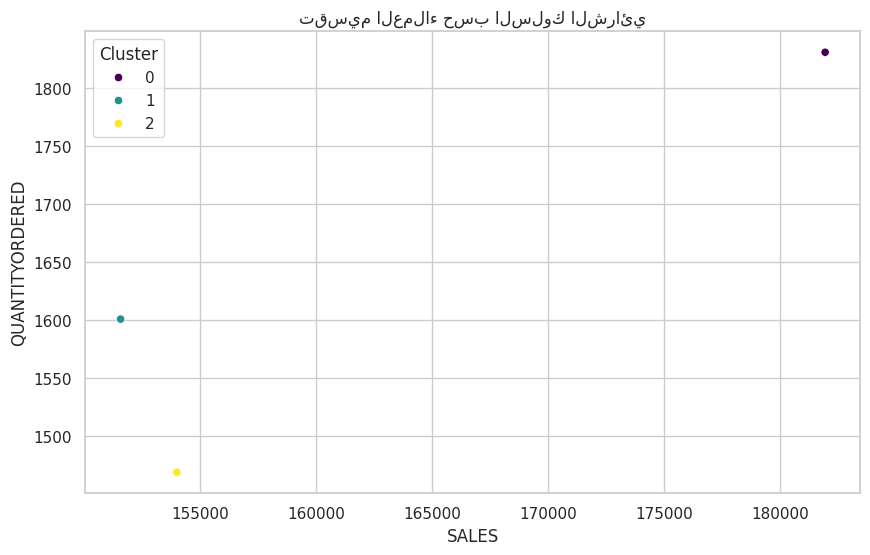

In [16]:
# تحضير بيانات العملاء
customer_data = data.groupby('CUSTOMERNAME')[['SALES', 'QUANTITYORDERED']].sum()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data)

# تطبيق K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# عرض النتائج
sns.scatterplot(data=customer_data, x='SALES', y='QUANTITYORDERED', hue='Cluster', palette='viridis')
plt.title('تقسيم العملاء حسب السلوك الشرائي')
plt.show()


. حفظ البيانات بعد التنظيف لعرضها في Power BI

In [17]:
data.to_excel('clean_sales_data.xlsx', index=False)
print("✅ تم حفظ الملف clean_sales_data.xlsx — يمكنك استيراده الآن في Power BI.")


✅ تم حفظ الملف clean_sales_data.xlsx — يمكنك استيراده الآن في Power BI.
